In [22]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Read the CSV file into a DataFrame
df = pd.read_csv('../data/prices_round_1_day_0.csv', delimiter=';')

# Filter the DataFrame to focus on STARFRUIT
starfruit_df = df[df['product'] == 'STARFRUIT']

# Calculate the mid price as the average of the best bid and best ask
starfruit_df['mid_price'] = (starfruit_df['bid_price_1'] + starfruit_df['ask_price_1']) / 2

# Create a list of Starfruit prices
prices = starfruit_df['mid_price'].tolist()

# Initialize lists to store input features (X) and target values (Y)
X = []
Y = []

# Populate the input features and target values using a sliding window approach
window_size = 4
for i in range(len(prices) - window_size):
    window = prices[i:i+window_size]
    target = prices[i+window_size]
    X.append(window)
    Y.append(target)

# Initialize the linear regression model
model = LinearRegression()

# Fit the model to the data
model.fit(X, Y)

# Extract the coefficients (weights) and bias (intercept) from the model
coefficients = model.coef_
bias = model.intercept_

print("Coefficients (Weights):", coefficients)
print("Bias (Intercept):", bias)


Coefficients (Weights): [0.09689353 0.09051234 0.12669606 0.14790473 0.22427233 0.31088816]
Bias (Intercept): 14.33334143594766


C:\Users\YashS\AppData\Local\Temp\ipykernel_22732\296237119.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  starfruit_df['mid_price'] = (starfruit_df['bid_price_1'] + starfruit_df['ask_price_1']) / 2


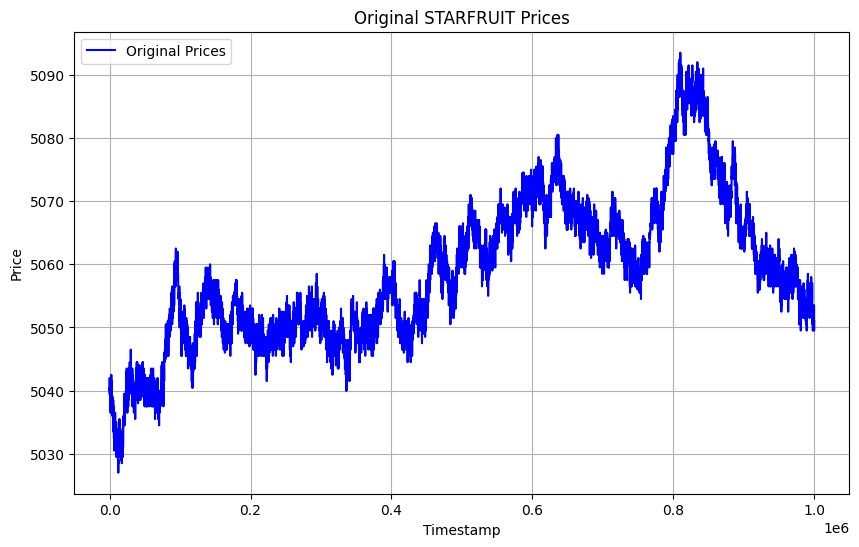

In [12]:
# Plot the original graph
plt.figure(figsize=(10, 6))
plt.plot(starfruit_df['timestamp'], starfruit_df['mid_price'], label='Original Prices', color='blue')
plt.xlabel('Timestamp')
plt.ylabel('Price')
plt.title('Original STARFRUIT Prices')
plt.legend()
plt.grid(True)
plt.show()

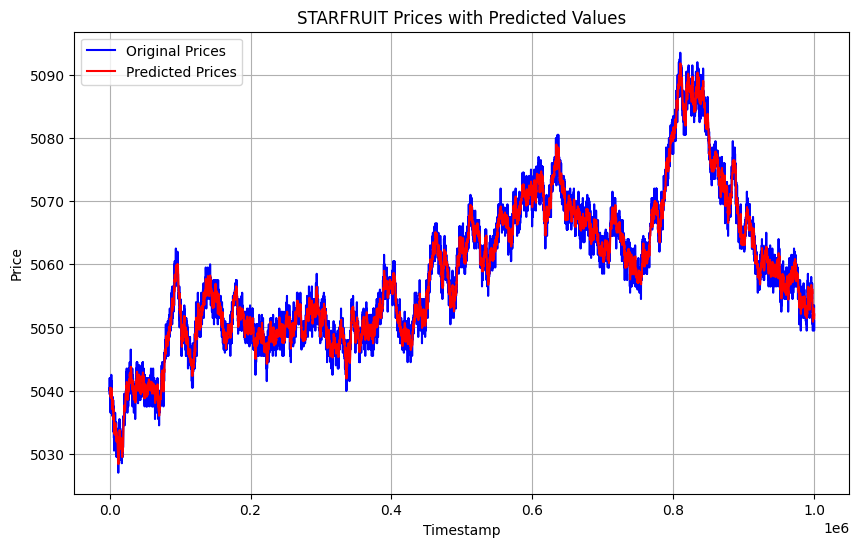

In [13]:
# Plot the graph with predicted values
plt.figure(figsize=(10, 6))
plt.plot(starfruit_df['timestamp'], starfruit_df['mid_price'], label='Original Prices', color='blue')
plt.plot(starfruit_df['timestamp'][window_size:], model.predict(X), label='Predicted Prices', color='red')
plt.xlabel('Timestamp')
plt.ylabel('Price')
plt.title('STARFRUIT Prices with Predicted Values')
plt.legend()
plt.grid(True)
plt.show()